# Compare Machine Learning Algorithms

><small><i>from the book 
"Machine Learning Mastery With Python: Understand Your Data, Create Accurate Models and Work Projects End-To-End"
by Jason Brownlee, Migrated to Jupyter with additions by Mitch Sanders 2017</i></small>




It is important to compare the performance of multiple different machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple different machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and different
algorithms to compare. After completing this lesson you will know:

1. How to formulate an experiment to directly compare machine learning algorithms.
2. A reusable template for evaluating the performance of multiple algorithms on one dataset.
3. How to report and visualize the results when comparing algorithm performance.

Let’s get started.

## Choose The Best Machine Learning Model

When you work on a machine learning project, you often end up with multiple good models
to choose from. Each model will have different performance characteristics. Using resampling
methods like cross-validation, you can get an estimate for how accurate each model may be on
unseen data. You need to be able to use these estimates to choose one or two best models from
the suite of models that you have created.

When you have a new dataset, it is a good idea to visualize the data using different techniques
in order to look at the data from different perspectives. The same idea applies to model selection.
You should use a number of different ways of looking at the estimated accuracy of your machine
learning algorithms in order to choose the one or two algorithm to finalize. A way to do this is
to use visualization methods to show the average accuracy, variance and other properties of the
distribution of model accuracies. In the next section you will discover exactly how you can do
that in Python with scikit-learn.

## Compare Machine Learning Algorithms Consistently 
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. In the example below six different classification
algorithms are compared on a single dataset:

- **Logistic Regression.**
- **Linear Discriminant Analysis.**
- **k-Nearest Neighbors.**
- **Classification and Regression Trees.**
- **Naive Bayes.**
- **Support Vector Machines.**

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross-validation procedure is used to
evaluate each algorithm, importantly configured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.



Running the example provides a list of each algorithm short name, the mean accuracy and
the standard deviation accuracy.

The example also provides a box and whisker plot showing the spread of the accuracy scores
across each cross-validation fold for each algorithm.


LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.691285 (0.068849)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


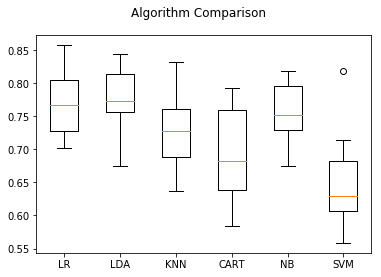

In [1]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
filename = '../pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


From these results, it would suggest that both logistic regression and linear discriminant
analysis are perhaps worthy of further study on this problem.

## Summary
In this chapter you discovered how to evaluate multiple different machine learning algorithms
on a dataset in Python with scikit-learn. You learned how to both use the same test harness to
evaluate the algorithms and how to summarize the results both numerically and using a box
and whisker plot. You can use this recipe as a template for evaluating multiple algorithms on
your own problems.

### Next
In this lesson you learned how to compare the performance of machine learning algorithms to
each other. But what if you need to prepare your data as part of the comparison process. In
the next lesson you will discover Pipelines in scikit-learn and how they overcome the common
problems of data leakage when comparing machine learning algorithms.


<hr>

### About the Pima Indian Dataset 

#### Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 